# Swiggy Sales Analysis

This project analyzes food delivery sales data from Swiggy to understand business performance across time, location, and food categories.  
The goal is to extract key insights and KPIs that support business decision-making in the food delivery domain.
Based on these insights, the study emphasizes key business areas that can drive revenue and operational improvements.

In [ ]:
This analysis aims to answer the following business questions:

- Which cities and states generate the highest revenue?
- Do Non-Veg items contribute more sales than Veg items?
- How does revenue vary across months and weekdays?
- How are ratings distributed across orders?

## Importing Libraries

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

### Load the data

In [4]:
df=pd.read_excel('swiggy_data.xlsx')

In [5]:
df.head()

,State,City,Order Date,Restaurant Name,Location,Category,Dish Name,Price (INR),Rating,Rating Count
0,Karnataka,Bengaluru,2025-06-29,Anand Sweets & Savouries,Rajarajeshwari Nagar,Snack,Butter Murukku-200gm,133.9,4.0,0
1,Karnataka,Bengaluru,2025-04-03,Srinidhi Sagar Deluxe,Kengeri,Recommended,Badam Milk,52.0,4.5,25
2,Karnataka,Bengaluru,2025-01-15,Srinidhi Sagar Deluxe,Kengeri,Recommended,Chow Chow Bath,117.0,4.7,48
3,Karnataka,Bengaluru,2025-04-17,Srinidhi Sagar Deluxe,Kengeri,Recommended,Kesari Bath,65.0,4.6,65
4,Karnataka,Bengaluru,2025-03-13,Srinidhi Sagar Deluxe,Kengeri,Recommended,Mix Raitha,130.0,4.0,0


In [6]:
df.tail()

,State,City,Order Date,Restaurant Name,Location,Category,Dish Name,Price (INR),Rating,Rating Count
197425,Sikkim,Gangtok,2025-01-25,Mama's Kitchen,Gangtok,Momos,Soya cheese chilli momo ...,112.0,4.4,0
197426,Sikkim,Gangtok,2025-07-02,Mama's Kitchen,Gangtok,Momos,Kurkure momo fried ...,140.0,4.4,0
197427,Sikkim,Gangtok,2025-03-25,Mama's Kitchen,Gangtok,Momos,Chilli cheese momo,126.0,4.4,0
197428,Sikkim,Gangtok,2025-03-26,Mama's Kitchen,Gangtok,Momos,Veg Momos (8 Pc),85.0,4.4,0
197429,Sikkim,Gangtok,2025-03-27,Mama's Kitchen,Gangtok,Momos,Soya Momo,100.0,4.4,0


### Basic checks

In [8]:
df.shape

(197430, 10)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197430 entries, 0 to 197429
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   State            197430 non-null  object        
 1   City             197430 non-null  object        
 2   Order Date       197430 non-null  datetime64[ns]
 3   Restaurant Name  197430 non-null  object        
 4   Location         197430 non-null  object        
 5   Category         197430 non-null  object        
 6   Dish Name        197430 non-null  object        
 7   Price (INR)      197430 non-null  float64       
 8   Rating           197430 non-null  float64       
 9   Rating Count     197430 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 15.1+ MB


In [10]:
df.isnull().sum()

State              0
City               0
Order Date         0
Restaurant Name    0
Location           0
Category           0
Dish Name          0
Price (INR)        0
Rating             0
Rating Count       0
dtype: int64

In [11]:
df.describe()

,Order Date,Price (INR),Rating,Rating Count
count,197430,197430.000000,197430.000000,197430.000000
mean,2025-05-01 19:41:20.996808960,268.512920,4.341582,28.321805
min,2025-01-01 00:00:00,0.950000,1.500000,0.000000
25%,2025-03-01 00:00:00,139.000000,4.300000,0.000000
50%,2025-05-02 00:00:00,229.000000,4.400000,2.000000
75%,2025-07-01 00:00:00,329.000000,4.500000,15.000000
max,2025-08-31 00:00:00,8000.000000,5.000000,999.000000
std,NaN,219.338363,0.422585,87.542593


## KPI'S

#### Total Sales

In [19]:
total_sales=df['Price (INR)'].sum()
print('total_sales (INR):',round(total_sales,2))

total_sales (INR): 53012505.77


#### Average Rating

In [27]:
average_rating=df['Rating'].mean()
print('average_rating:',round(average_rating,1))

average_rating: 4.3


#### Average Order Value (₹)

In [29]:
avg_order_value=df['Price (INR)'].mean()
print('avg_order_value (INR):',round(avg_order_value,3))

avg_order_value (INR): 268.513


#### Ratings Count

In [30]:
rating_count=df['Rating Count'].sum()
print('rating_count:',rating_count)

rating_count: 5591574


#### Total Orders

In [31]:
total_orders=len(df)
print('total_orders:',total_orders)

total_orders: 197430


## CHARTS Design

#### Monthly Sales Trend

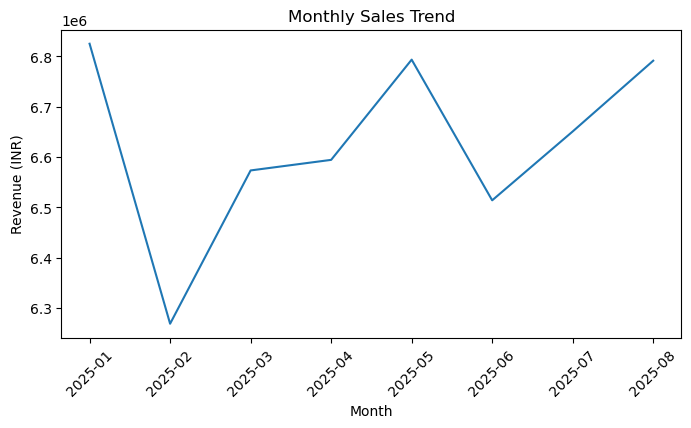

In [36]:
df['Order Date']=pd.to_datetime(df['Order Date'])
df['YearMonth']=df['Order Date'].dt.to_period('M').astype(str)
monthly_sales=df.groupby('YearMonth')['Price (INR)'].sum().reset_index()
plt.figure(figsize=(8,4))
plt.plot(monthly_sales['YearMonth'],monthly_sales['Price (INR)'])
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.ylabel('Revenue (INR)')
plt.title('Monthly Sales Trend')
plt.show()

Revenue is varied from  month to month, showing seasonal demand fluctuations in food ordering behavior.

#### Daily Sales Trend

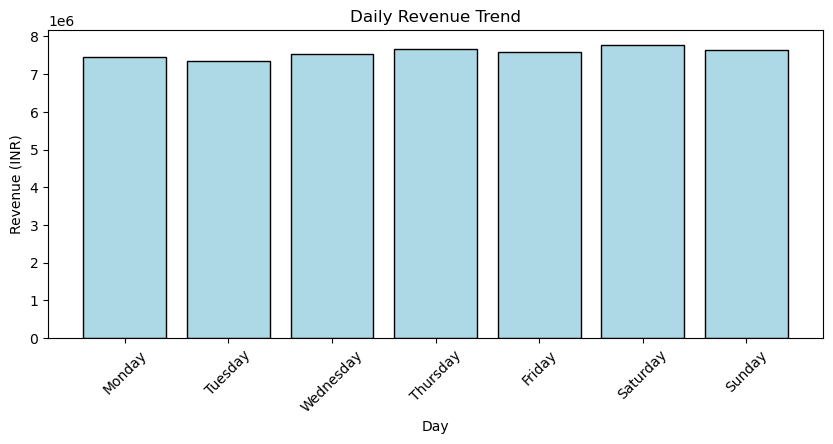

In [61]:
df['Order Date']=pd.to_datetime(df['Order Date'])
df['Day']=df['Order Date'].dt.day_name()
daily_revenue=df.groupby('Day')['Price (INR)'].sum().reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

plt.figure(figsize=(10,4))
plt.bar(daily_revenue.index,daily_revenue.values,color='lightblue',edgecolor='black')
plt.title('Daily Revenue Trend')
plt.xlabel('Day')
plt.xticks(rotation=45)
plt.ylabel('Revenue (INR)')
plt.show()

Peak revenue is generated in weekends or leisure days

#### Total Sales by Food Type (Veg vs Non-Veg)

In [89]:
df['dish_names']=df['Dish Name'].str.lower()
non_veg_items=['chicken','mutton','fish','egg','non-veg','kabab','kebab','non veg','prawn']

In [90]:
df['nonveg_dish_names']=df['dish_names'].apply(lambda x:any(word in x for word in non_veg_items))
N_V_D=df[df['nonveg_dish_names']==True][['Dish Name']]

In [84]:
N_V_D.head(10)

,Dish Name
235,Al Faham Chicken
236,Dragon Chicken
237,Chicken Manchow Soup
238,Chicken Noodles Soup
241,Thalassery Chicken Dum Biryani [Serves 1]
242,Leaf Chicken Dum Biryani
244,Thalassery Chicken Curry
245,Nadan Chicken Curry
246,Mutton Rogan Josh
247,Chicken Kondattam


In [93]:
df['Veg/NonVeg']=df['nonveg_dish_names'].apply(lambda x:('NonVeg') if x else ('Veg'))
V_D=df[df['Veg/NonVeg']=='Veg'][['Dish Name']]

In [94]:
V_D

,Dish Name
0,Butter Murukku-200gm
1,Badam Milk
2,Chow Chow Bath
3,Kesari Bath
4,Mix Raitha
...,...
197425,Soya cheese chilli momo ...
197426,Kurkure momo fried ...
197427,Chilli cheese momo
197428,Veg Momos (8 Pc)


In [95]:
food_revenue=df.groupby('Veg/NonVeg')['Price (INR)'].sum().reset_index()

In [ ]:
fig=px.pie(
    food_revenue,
    
)

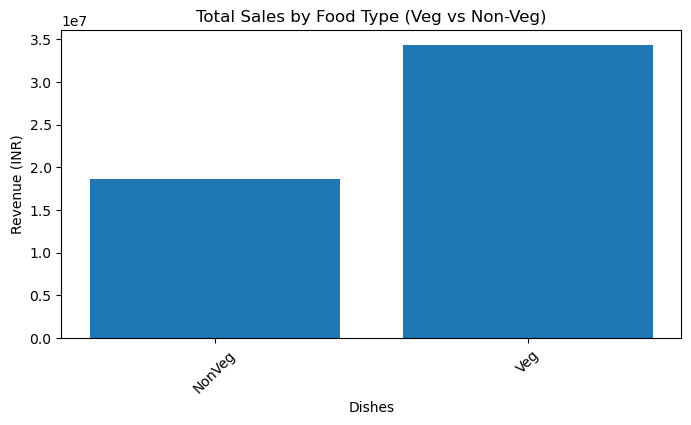

In [103]:
plt.figure(figsize=(8,4))
plt.bar(food_revenue['Veg/NonVeg'],food_revenue['Price (INR)'])
plt.xlabel('Dishes')
plt.xticks(rotation=45)
plt.ylabel('Revenue (INR)')
plt.title('Total Sales by Food Type (Veg vs Non-Veg)')
plt.show()

Non-Veg items generate a larger share of revenue compared to Veg items, indicating stronger customer preference.

#### Total Sales by State 

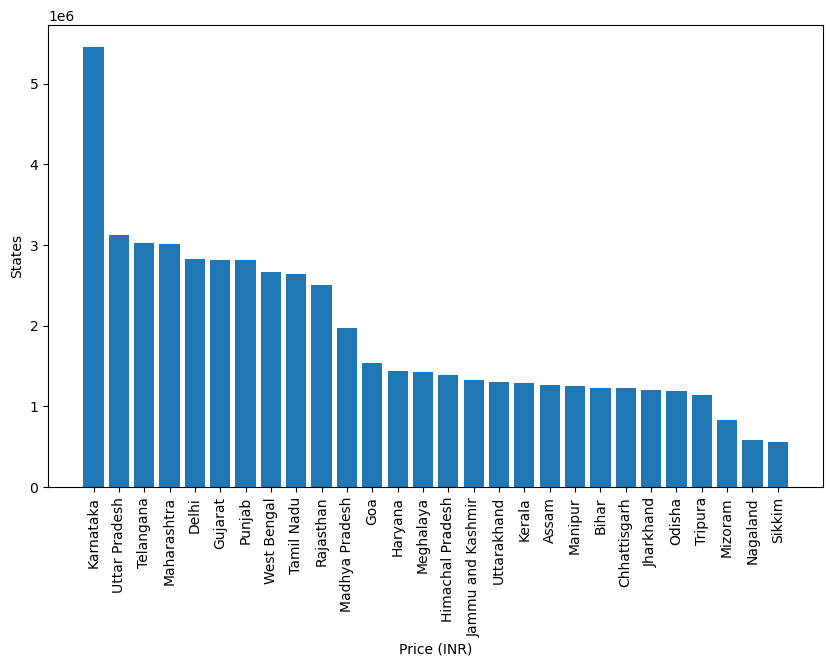

In [115]:
states_revenue=df.groupby('State',as_index=False)['Price (INR)'].sum().sort_values('Price (INR)',ascending=False)
plt.figure(figsize=(10,6))
plt.bar(states_revenue['State'],states_revenue['Price (INR)'])
plt.xlabel('Price (INR)')
plt.xticks(rotation=90)
plt.ylabel('States')
plt.show()

Where there is a high demand the sales are more in those places

#### Quarterly Performance Summary

In [122]:
df['Order Date']=pd.to_datetime(df['Order Date'])
df['Quater']=df['Order Date'].dt.to_period('Q').astype(str)
Quaterly_Summary=df.groupby('Quater',as_index=False).agg(
    Total_sales=('Price (INR)','sum'),
    Avg_Rating=('Rating','mean'),
    Total_Orders=('Order Date','count')
).sort_values('Quater')
Quaterly_Summary

,Quater,Total_sales,Avg_Rating,Total_Orders
0,2025Q1,19667821.77,4.342643,73096
1,2025Q2,19902256.59,4.340011,74163
2,2025Q3,13442427.41,4.342359,50171


It is divided into three quaters.
The number of sales are highly generated in first two quaters.

#### Top 5 Cities by Sales

In [127]:
Top_5_cities=df.groupby('City')['Price (INR)'].sum().nlargest(5).sort_values().reset_index()

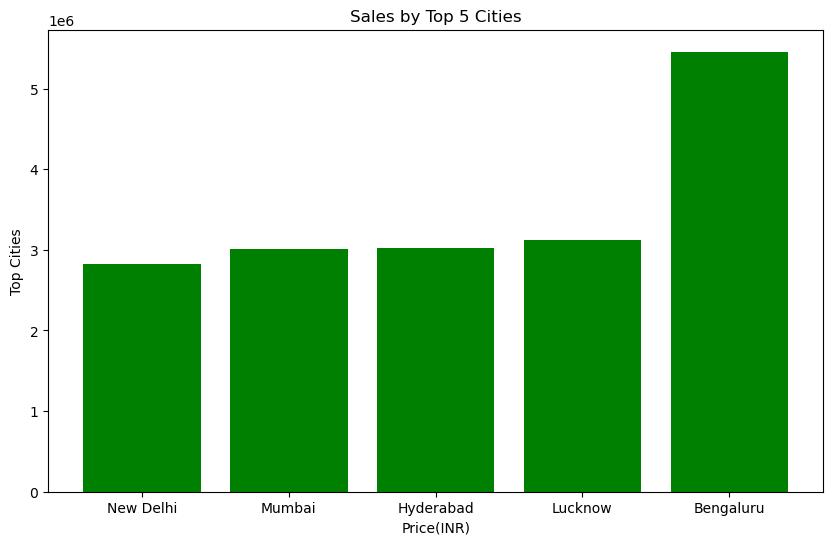

In [134]:
plt.figure(figsize=(10,6))
plt.bar(Top_5_cities['City'],Top_5_cities['Price (INR)'],color='green')
plt.xlabel('Price(INR)')
plt.xticks(rotation=360)
plt.ylabel('Top Cities')
plt.title('Sales by Top 5 Cities')
plt.show()

Revenue is generated highly in these states

#### Weekly Trend Analysis

In [131]:
df['Order Date']=pd.to_datetime(df['Order Date'])
df['WeekYear']=df['Order Date'].dt.strftime('%Y-%U')
WeeklyTrend=df.groupby('WeekYear')['Price (INR)'].sum().reset_index()

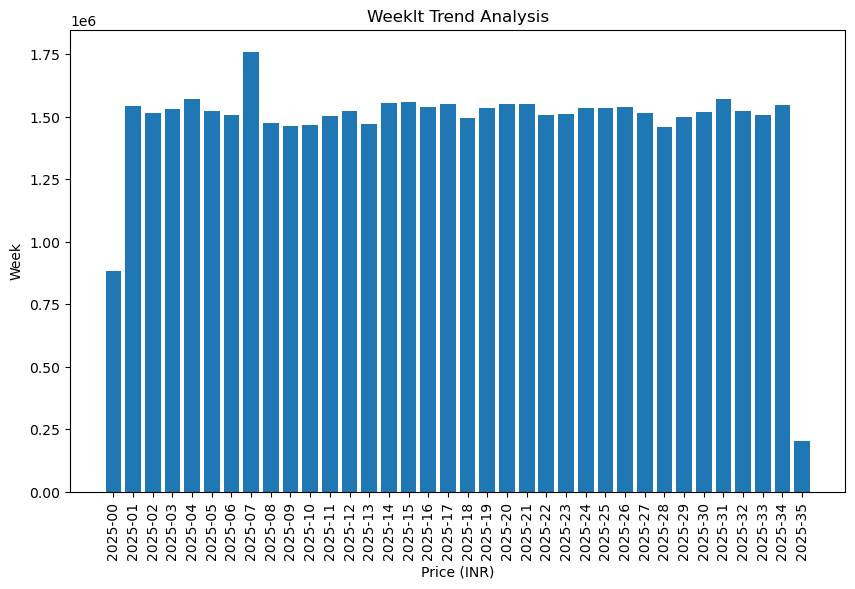

In [136]:
plt.figure(figsize=(10,6))
plt.bar(WeeklyTrend['WeekYear'],WeeklyTrend['Price (INR)'])
plt.xlabel('Price (INR)')
plt.xticks(rotation=90)
plt.ylabel('Week')
plt.title('Weeklt Trend Analysis')
plt.show()

In weekly trend it is observed that sales are flucuating.It may depends on many factors like seasonal demand and weather conditions,etc...

# Report and Conclusion

This project analyzes Swiggy food delivery data to evaluate sales performance, customer preferences and demand patterns using Python-based data analysis.

--- KPIs
- Total Revenue  
- Average Rating  
- Average Order Value  
- Total Ratings Count  
- Total Orders  

--- Analysis
Data was cleaned and enriched with time features and Veg/Non-Veg classification.  
Sales trends were analyzed across months, weekdays, and quarters, along with category (Veg vs Non-Veg) and geographic (state/city) performance.

--- Key Insights
- Revenue varies across time periods with peak demand days  
- Non-Veg items contribute major sales share  
- Sales are concentrated in a few top cities/states  
- Ratings indicate strong customer satisfaction

---CONCLUSION:
- The analysis shows how food delivery sales vary by time, location, and category.
- It demonstrates the use of data aggregation, feature engineering, and visualization to generate actionable business insights for marketing, menu        planning, and regional strategy in food delivery platforms.
- Non-Veg items contributing a larger share of sales.
- Food delivery revenue is concentrated in specific cities and states.
- These insights can support marketing focus, menu strategy, and resource allocation decisions in food delivery operations.

# Business Recommendations

Based on the analysis, the following actions can help improve business performance:

- Focus more marketing efforts in cities and states that generate the highest revenue  
- Promote popular Non-Veg dishes since they contribute more sales
- provide offers on Non-Veg dishes as they produce week revenue
- Provide offers or discounts on low-sales weekdays to increase orders
- Collaborate more with highly rated restaurants to maintain customer satisfaction  
- Plan delivery staff and operations based on peak order time periods
- Keep offers according to the season,so the sales goes on increasing continuously
- Plan any additional complemantary dishes along with the orderd item
- Attract by giving more coupons
- Collaborate with other industries that gives huge discounts on their products if customer uses your coupons